In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import MinMaxScaler

In [30]:
df=pd.read_csv('GOOGL.csv')

In [31]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [32]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [33]:
scaler=MinMaxScaler(feature_range=(0,1))


In [34]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
data=df[['Close']]

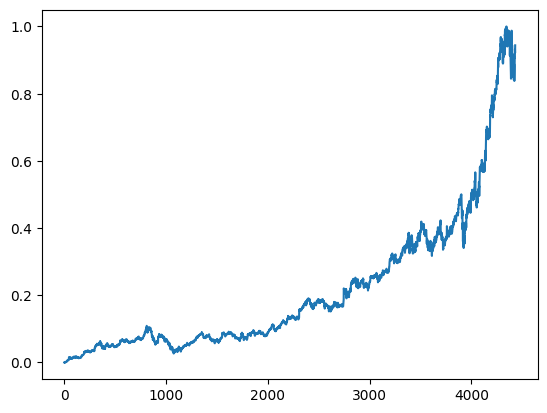

In [35]:
scaled_data = scaler.fit_transform(data)
plt.plot(scaled_data)

In [36]:
def create(time,scaled_data):
    x,y=[],[]
    for i in range(time,len(scaled_data)):
        x.append(scaled_data[i-time:i,0])
        y.append(scaled_data[i,0])
    return np.asarray(x),np.asarray(y)
x,y=create(60,scaled_data)
x=x.reshape(x.shape[0],x.shape[1],1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)



In [37]:
model=Sequential()
model.add(SimpleRNN(units=100,input_shape=(x_train.shape[1],1),return_sequences=True))
model.add(SimpleRNN(units=40,return_sequences=True))
model.add(SimpleRNN(units=20,return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss=['mean_squared_error'])
model.summary()

C:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 60, 100)             │          10,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 60, 40)              │           5,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_5 (SimpleRNN)             │ (None, 20)                  │           1,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,081 (66.72 KB)

 Trainable params: 17,081 (66.72 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history=model.fit(x_train,y_train,epochs=40,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0439 - val_loss: 0.0526
Epoch 2/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.7458e-04 - val_loss: 0.0320
Epoch 3/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 5.3349e-05 - val_loss: 0.0262
Epoch 4/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.4548e-05 - val_loss: 0.0253
Epoch 5/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 6.9564e-05 - val_loss: 0.0233
Epoch 6/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.2302e-05 - val_loss: 0.0261
Epoch 7/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.6912e-04 - val_loss: 0.0209
Epoch 8/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.4685e-05 - val_loss: 0.0195
Epoch 9/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.1914e-04 - val_loss: 0.0192
Epoch 10/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.7249e-05 - val_loss: 0.0178
Epoch 11/40
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 4.6079e-05 - val_loss: 0.0152
Epoch 12/40
55/55 ━━━━━

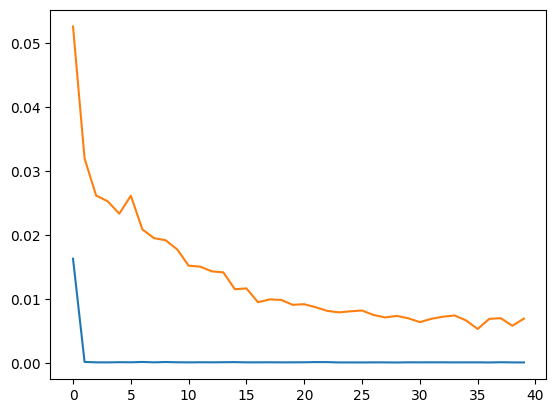

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [40]:
y_predict=model.predict(x_test)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


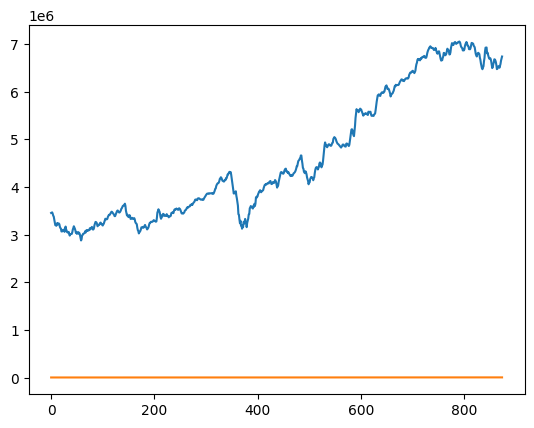

In [42]:
y_predict=scaler.inverse_transform(y_predict)
y_actual=scaler.inverse_transform(y_test.reshape(-1,1))
plt.plot(y_predict)
plt.plot(y_actual)